In [12]:
import cv2
import numpy as np
from PIL import Image
import numpy as np
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
import random

In [6]:
gaussian = iaa.Sequential([
     # gaussian noise
        iaa.AdditiveGaussianNoise(loc=0, scale=0.1*255)
])
poisson = iaa.Sequential([
      # poisson noise
        iaa.AdditivePoissonNoise(lam=10.0, per_channel=True)
])
saltPepper = iaa.Sequential([
     # salt and pepper
        iaa.SaltAndPepper(0.1)])

## Adding  GaussianNoise, PoissonNoise and SaltPepper

In [7]:
img = cv2.imread('img.jpg')

imglist = []

imglist.append(img)

# gaussian noise
images_aug = gaussian.augment_images(imglist)
cv2.imwrite('GaussianNoise.jpg', images_aug[0])

# poisson noise
images_aug = poisson.augment_images(imglist)
cv2.imwrite('PoissonNoise.jpg', images_aug[0])

# salt and pepper noise
images_aug = saltPepper.augment_images(imglist)
cv2.imwrite('SaltPepper.jpg', images_aug[0])

True

## Different edge detection techniques

1. Canny: The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works.

2. Sobel:  Sobel works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.

3. Prewitt: Prewitt operator is used for edge detection in an image. Prewitt operator detects both types of edges, these are: Horizontal edges or along the x-axis, Vertical Edges or along the y-axis.

4. Laplacian: The Laplacian is a 2-D isotropic measure of the 2nd spatial derivative of an image. The Laplacian of an image highlights regions of rapid intensity change and is therefore often used for edge detection


Text(0.5, 1.0, 'Prewitt')

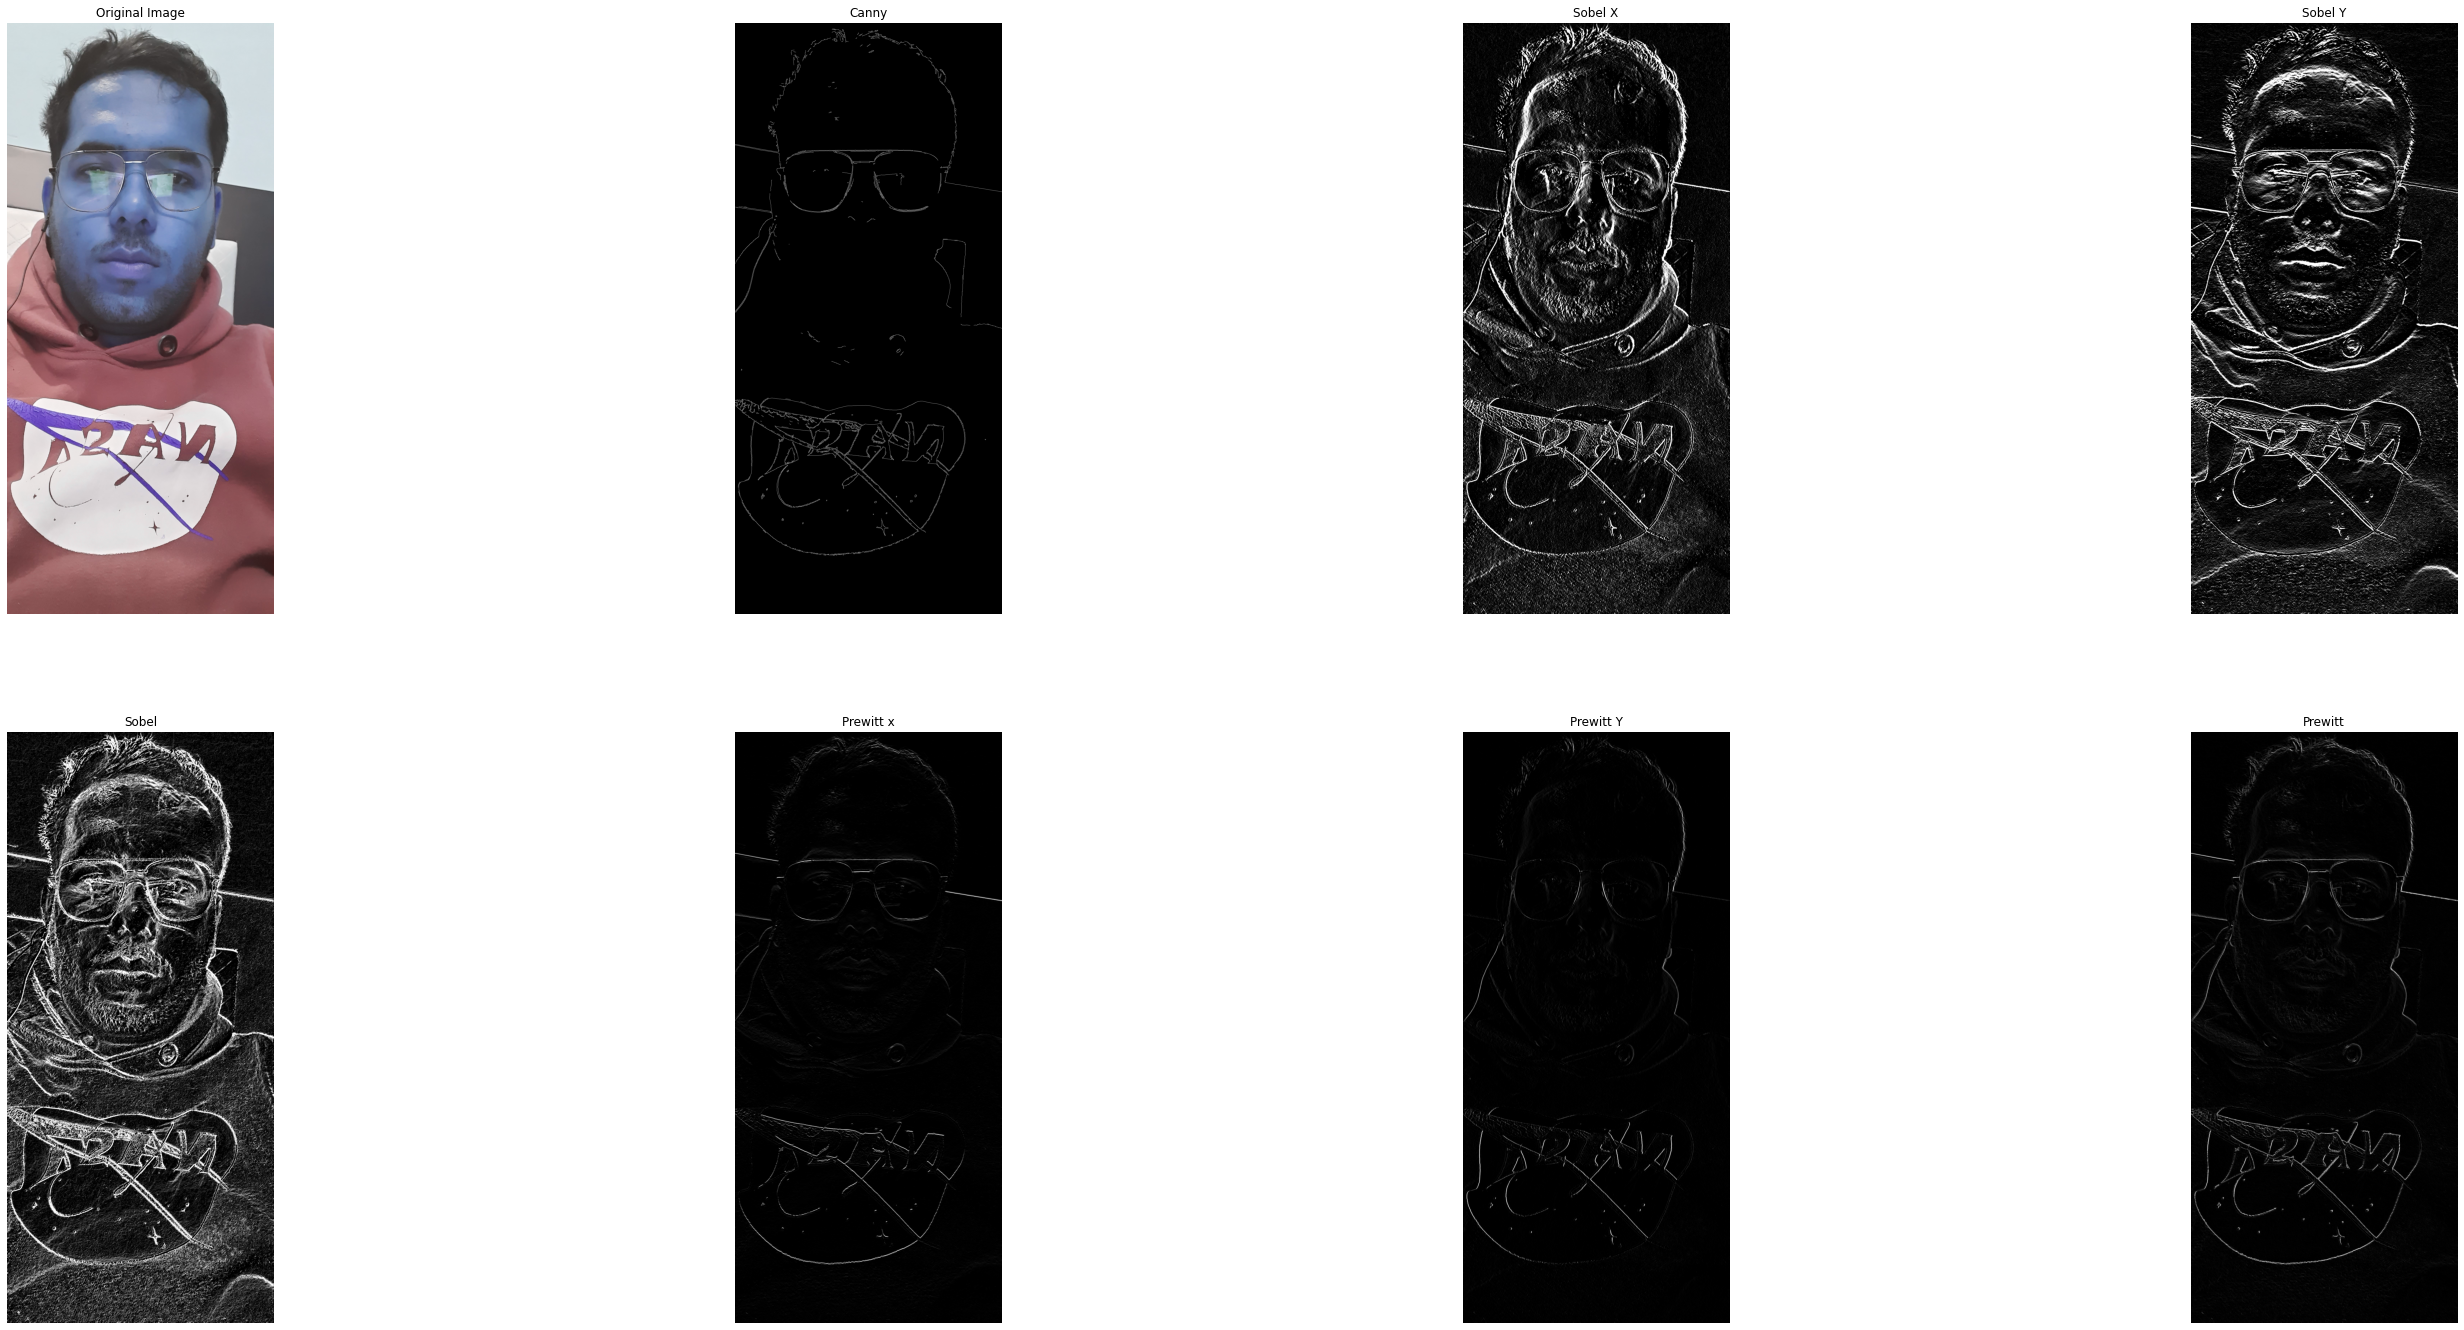

In [37]:
img = cv2.imread('img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


# Plotting images using matplotlib

# create figure
fig = plt.figure(figsize=(50, 50))

plt.subplot(441)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original Image")

plt.subplot(442)
plt.imshow(img_canny, cmap='gray')
plt.axis('off')
plt.title("Canny")

plt.subplot(443)
plt.imshow(img_sobelx, cmap='gray')
plt.axis('off')
plt.title("Sobel X")

plt.subplot(444)
plt.imshow(img_sobely, cmap='gray')
plt.axis('off')
plt.title("Sobel Y")

plt.subplot(445)
plt.imshow(img_sobel, cmap='gray')
plt.axis('off')
plt.title("Sobel")

plt.subplot(446)
plt.imshow(img_prewittx, cmap='gray')
plt.axis('off')
plt.title("Prewitt x")

plt.subplot(447)
plt.imshow(img_prewitty, cmap='gray')
plt.axis('off')
plt.title("Prewitt Y")

plt.subplot(448)
plt.imshow(img_prewittx + img_prewitty, cmap='gray')
plt.axis('off')
plt.title("Prewitt")

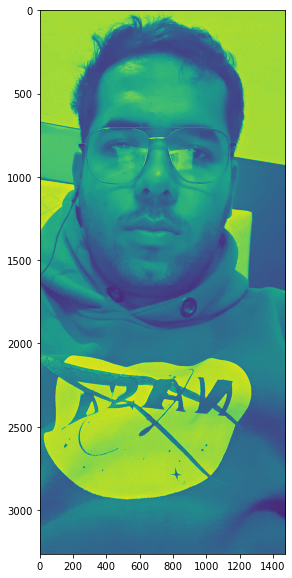

In [16]:
img = cv2.imread('img.jpg',cv2.IMREAD_GRAYSCALE)
row , col = img.shape
     
# Randomly pick some pixels in the
# image for coloring them white
# Pick a random number between 300 and 10000
number_of_pixels = random.randint(300, 10000)
for i in range(number_of_pixels):
       
    # Pick a random y coordinate
    y_coord=random.randint(0, row - 1)
         
    # Pick a random x coordinate
    x_coord=random.randint(0, col - 1)
         
    # Color that pixel to white
    img[y_coord][x_coord] = 255
         
# Randomly pick some pixels in
# the image for coloring them black
# Pick a random number between 300 and 10000
number_of_pixels = random.randint(300 , 10000)
for i in range(number_of_pixels):
       
    # Pick a random y coordinate
    y_coord=random.randint(0, row - 1)
         
    # Pick a random x coordinate
    x_coord=random.randint(0, col - 1)
         
    # Color that pixel to black
    img[y_coord][x_coord] = 0
    
plt.figure(figsize=(10,10))
plt.imshow(img)    

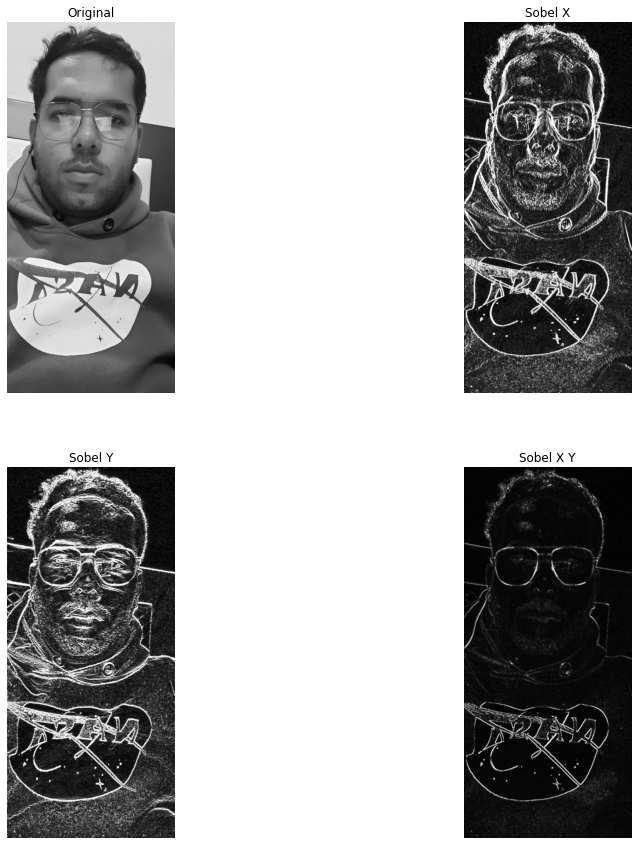

In [21]:
original_img = cv2.imread('img.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray,(3,3),0)
sobelx = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
filtered_image_x = cv2.convertScaleAbs(sobelx)
 
sobely = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
filtered_image_y = cv2.convertScaleAbs(sobely)
 
sobelxy = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
filtered_image_xy = cv2.convertScaleAbs(sobelxy)
 
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(blur_img, cmap='gray')
plt.title('Original') 
plt.axis("off")
 
plt.subplot(222)
plt.imshow(filtered_image_x, cmap='gray')
plt.title('Sobel X') 
plt.axis("off")
 
plt.subplot(223)
plt.imshow(filtered_image_y, cmap='gray')
plt.title('Sobel Y') 
plt.axis("off")
 
plt.subplot(224)
plt.imshow(filtered_image_xy, cmap='gray')
plt.title('Sobel X Y')
plt.axis("off")
plt.show()


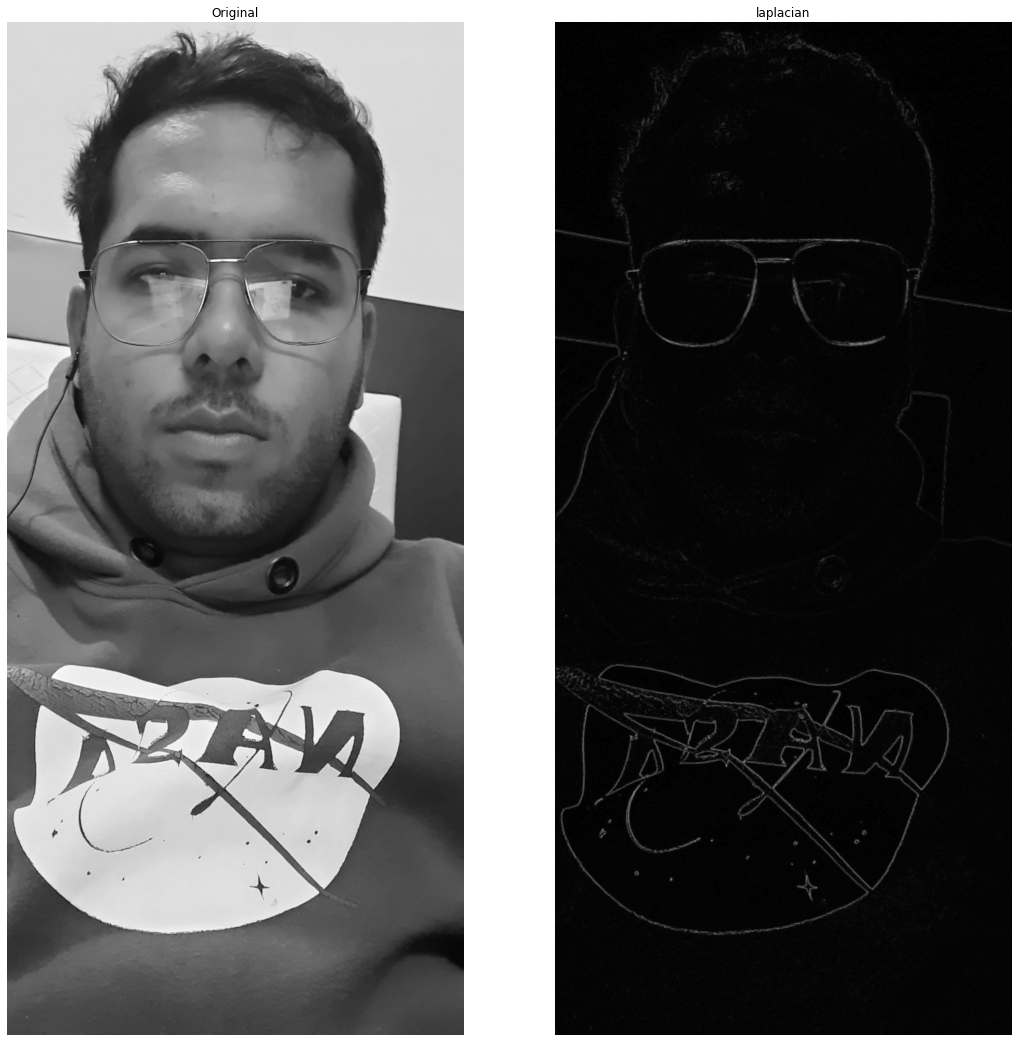

In [33]:
laplacian = cv2.Laplacian(blur_img,5,cv2.CV_64F)
filtered_image = cv2.convertScaleAbs(laplacian)
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(blur_img, cmap='gray')
plt.title('Original') 
plt.axis("off")
 
plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('laplacian')
plt.axis("off")
plt.show()

## Adaptive Thresholding

we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

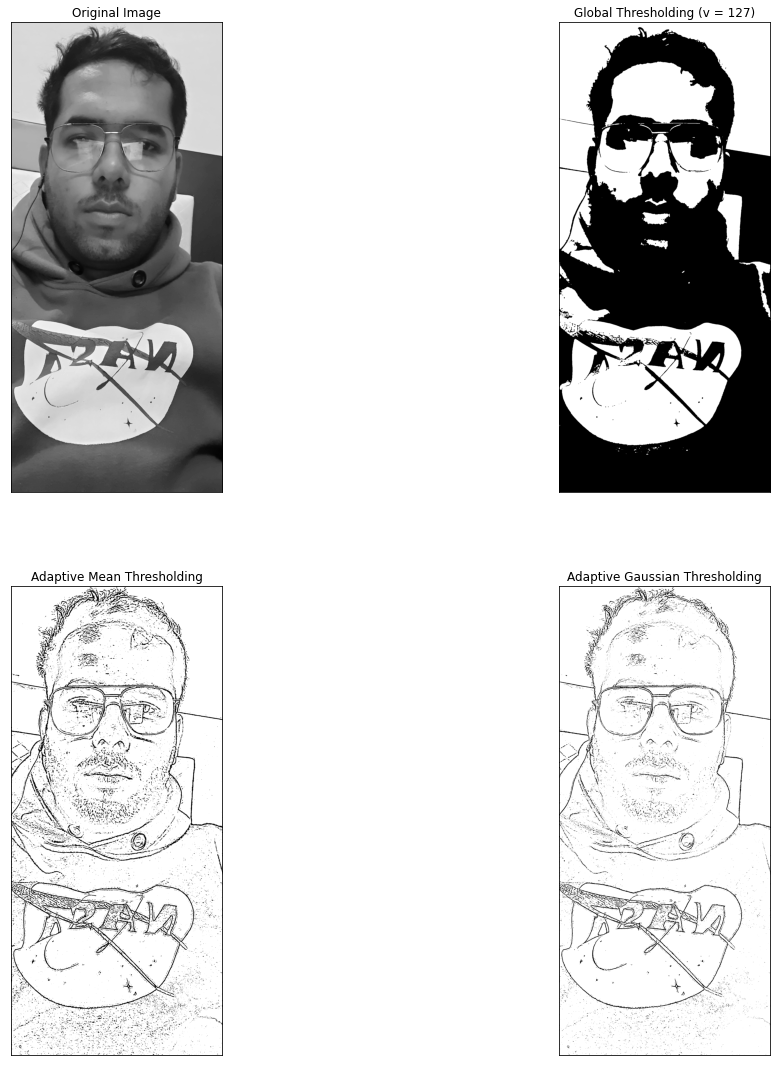

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(18,19))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()